DB Index: 0.5102672190406982
Silhouette Score: 0.10519074107869868


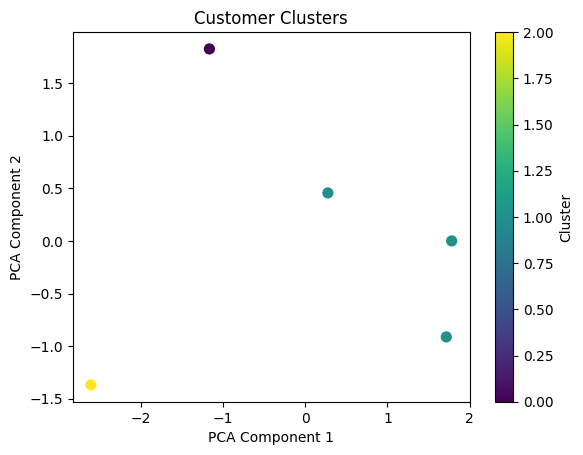

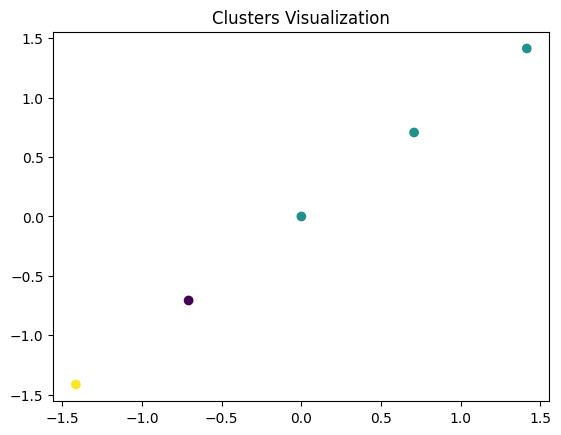

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
transactions = pd.read_csv('Transactions.csv')
customers = pd.read_csv('Customers.csv')

# Merge the datasets
data = pd.merge(transactions, customers, on="CustomerID", how="inner")

# Group and aggregate data (without TransactionDate/Recency)
agg_data = data.groupby("CustomerID").agg({
    "TotalValue": ["sum", "mean"],  # Total and average transaction value
    "TransactionID": "count",       # Number of transactions (frequency)
    "ProductID": "nunique"          # Number of unique products purchased
}).reset_index()

# Rename columns for clarity
agg_data.columns = ["CustomerID", "TotalSpend", "AvgTransactionValue", "TransactionCount", "ProductDiversity"]

# Optional: Add Region from Customers.csv
agg_data = pd.merge(agg_data, customers[["CustomerID", "Region"]], on="CustomerID")
agg_data = pd.get_dummies(agg_data, columns=["Region"], drop_first=True)

# Scale the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(agg_data.drop("CustomerID", axis=1))

# Step 2: Clustering
n_clusters = 3  # Choose a valid number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
agg_data["Cluster"] = clusters

# Step 3: Evaluate clustering
if len(set(clusters)) > 1:  # Ensure there are at least 2 clusters
    db_index = davies_bouldin_score(scaled_data, clusters)
    silhouette_avg = silhouette_score(scaled_data, clusters)

    print(f"DB Index: {db_index}")
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Error: The clustering resulted in only one cluster. Please reduce the number of clusters or check the data.")

# Visualize clusters using PCA (2D)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap="viridis", s=50)
plt.title("Customer Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

# Optional: Visualize clusters in the original scaled space (2D)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.title("Clusters Visualization")
plt.show()


/content
Davies-Bouldin Index: 0.46674046837251765


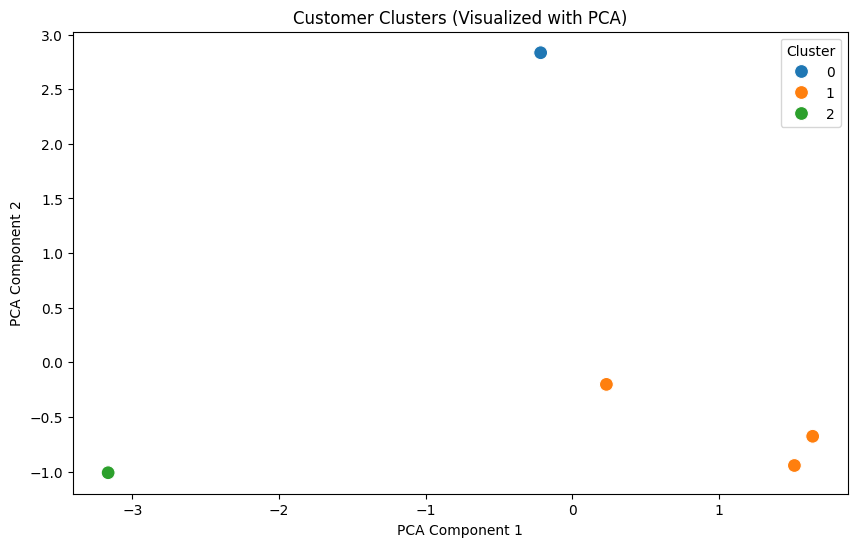

Clustering results saved to 'Customer_Clusters.csv'


In [19]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
print(os.getcwd())


# Normalize numerical features
scaler = StandardScaler()
normalized_data = scaler.fit_transform(customer_summary.drop('CustomerID', axis=1))

# Adjust clusters based on the number of samples
n_clusters = min(3, len(customer_summary) - 1)  # At most n_samples - 1
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Add clusters to the dataset
customer_summary['Cluster'] = clusters

# Evaluate clustering if valid
if n_clusters > 1:
    db_index = davies_bouldin_score(normalized_data, clusters)
    print(f"Davies-Bouldin Index: {db_index}")
else:
    print("Not enough clusters to calculate Davies-Bouldin Index.")

# Visualize clusters with PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=customer_summary['Cluster'], palette='tab10', s=100)
plt.title('Customer Clusters (Visualized with PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Save results
customer_summary.to_csv('Customer_Clusters.csv', index=False)
print("Clustering results saved to 'Customer_Clusters.csv'")
